In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import copy
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download("punkt")
nltk.download("stopwords")
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading Datset**

In [4]:
data = pd.read_csv("/content/spam (1).csv",encoding='ISO-8859-1')

In [5]:
df = data.copy()

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [9]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
df.rename(columns = {"v1" : "target", "v2" : "text"}, inplace = True)

In [11]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
encoder = LabelEncoder()

In [13]:
df["target"] = encoder.fit_transform(df["target"])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham = 0

spam = 1

**missing value**

In [15]:
df.isnull().sum()

,0
target,0
text,0


In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = "first")

In [18]:
df.duplicated().sum()

0

**EDA**

In [19]:
df["target"].value_counts()

,count
target,
0,4516
1,653


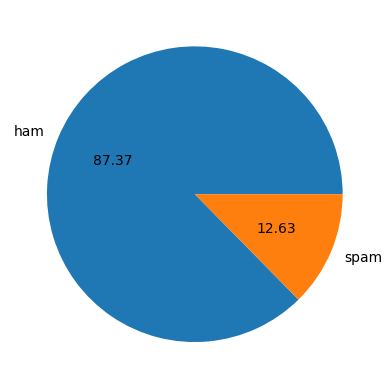

In [20]:
plt.pie(df["target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

**Data is Imblance**

In [21]:
df["num_characters"] = df["text"].apply(len)

**num of words**

In [22]:
df["num_word"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

num of sentances

In [23]:
df["num_sent"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.head(3)

,target,text,num_characters,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,5169.0,0.126330,0.332253,0.0,0.0,0.0,0.0,1.0
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_word,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
num_sent,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


**For ham**

In [26]:
df[df["target"] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,4516.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_word,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
num_sent,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


**for spam**

In [27]:
df[df["target"] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,653.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_word,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sent,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


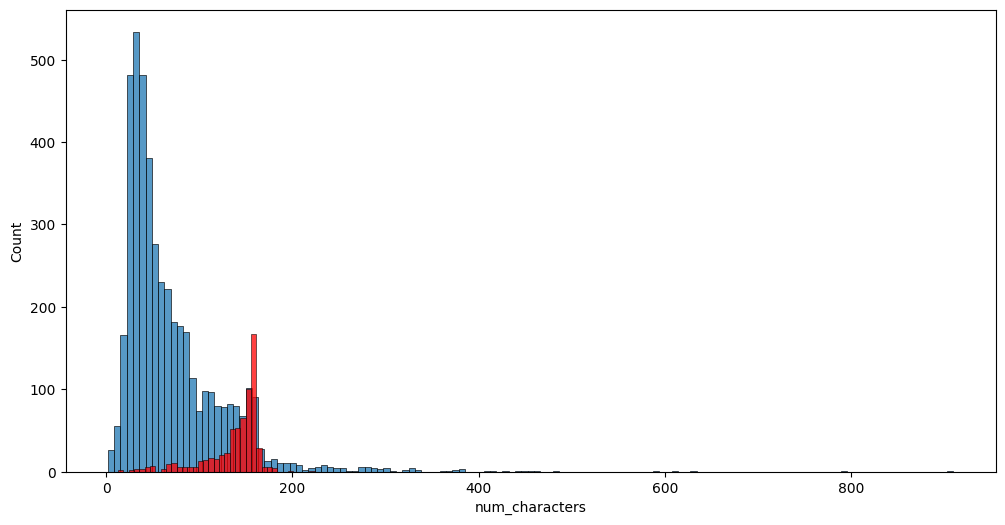

In [28]:
plt.figure(figsize = (12,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color = "red")
plt.show()

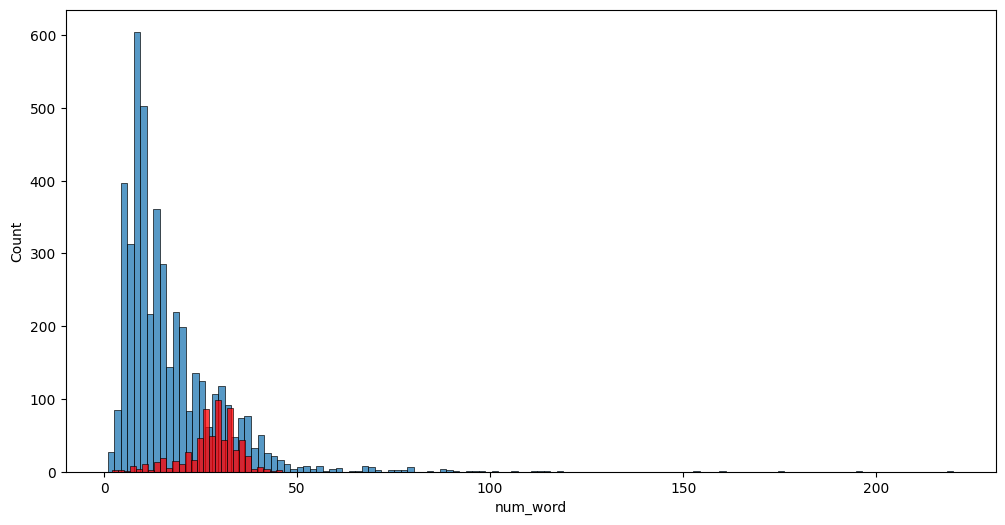

In [29]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df["target"] == 0]["num_word"])
sns.histplot(df[df["target"] == 1]["num_word"], color = "red")
plt.show()

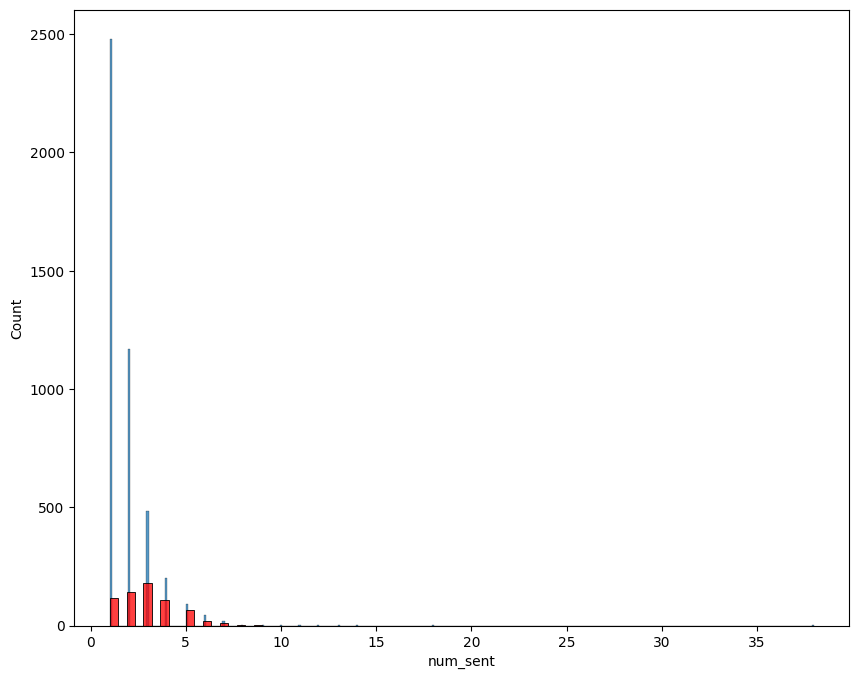

In [30]:
plt.figure(figsize = (10, 8))
sns.histplot(df[df["target"] == 0]["num_sent"])
sns.histplot(df[df["target"] == 1]["num_sent"], color = "red")
plt.show()

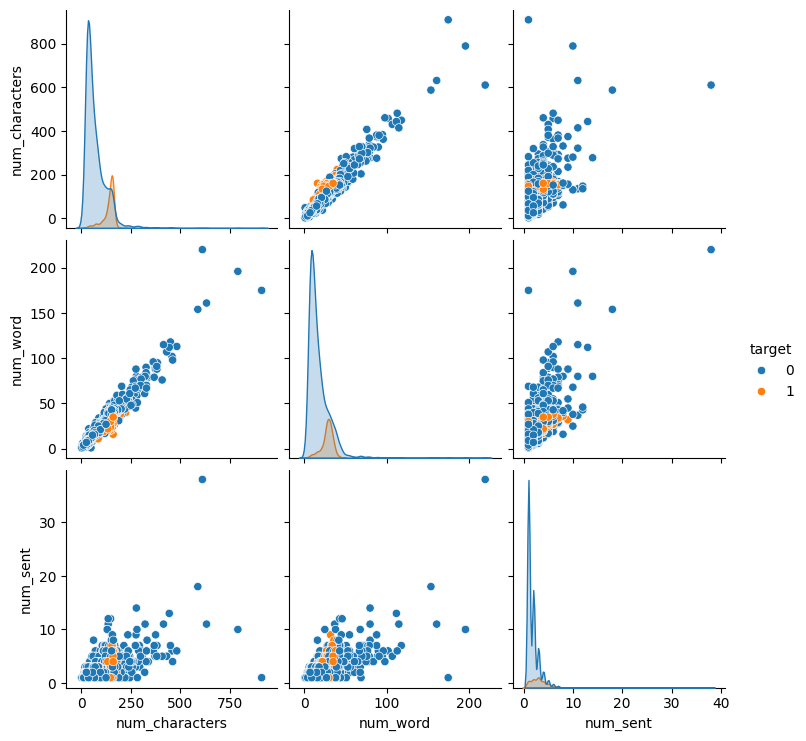

In [31]:
sns.pairplot(df, hue = "target")

In [32]:
df_text = df[["target", "num_characters", "num_word", "num_sent"]]

In [33]:
df_text

,target,num_characters,num_word,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


In [34]:
df_text.corr()

,target,num_characters,num_word,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_word,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

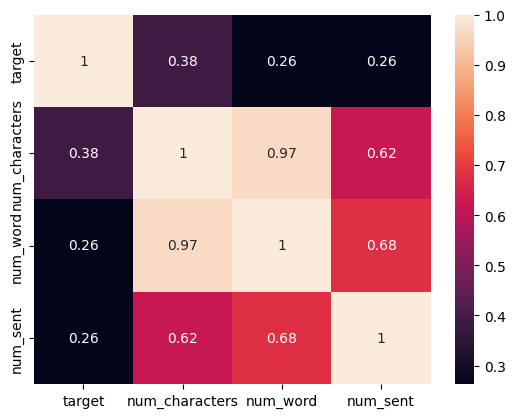

In [35]:
sns.heatmap(df_text.corr(), annot = True)

**Data Preprocessing**
* lowe case
* tokenization
* Removing Special characters
* Removing stop words and punctuation
* Stemming

In [36]:
ps = PorterStemmer()

In [37]:
def text_transform(text) :

  # convert in lower case
  text = text.lower()

  # make tokens
  text = nltk.word_tokenize(text)

  # remove special characters
  words = []

  for word in text :
    if word.isalnum() :
      words.append(word)

  # clon the list because list is a mutable datatype
  text = words[:]
  words.clear()
  dell = []
  # punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
  for i in text :
    if i not in stopwords.words("english") and i not in string.punctuation :
      words.append(i)
    else :
      dell.append(i)
  #print(dell)


  text = words[:]
  words.clear()

  # stemming
  for stemm  in text :
    words.append(ps.stem(stemm))


  return " ".join(words)

In [38]:
df["text_transform"] = df["text"].apply(text_transform)

In [39]:
df.head()

,target,text,num_characters,num_word,num_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = "white")

In [41]:
spam_wc = wc.generate(df[df["target"] == 1]["text_transform"].str.cat(sep = " "))

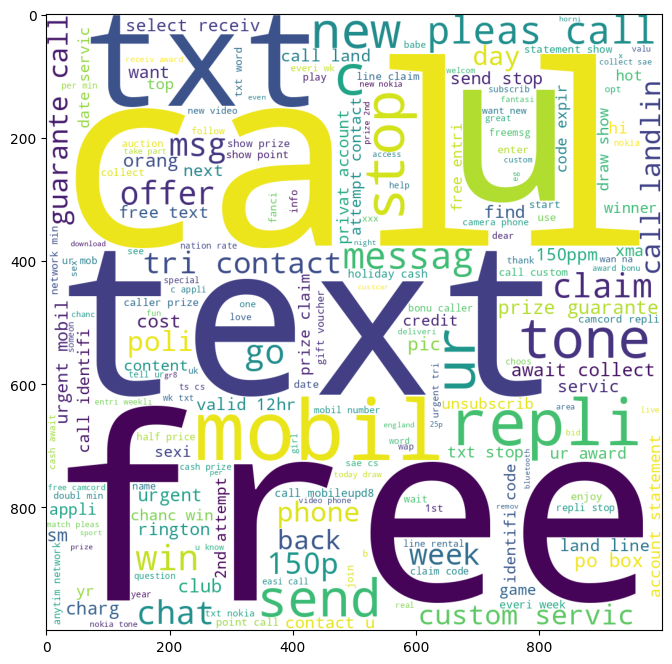

In [42]:
plt.figure(figsize = (12, 8))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df["target"] == 0]["text_transform"].str.cat(sep = " "))

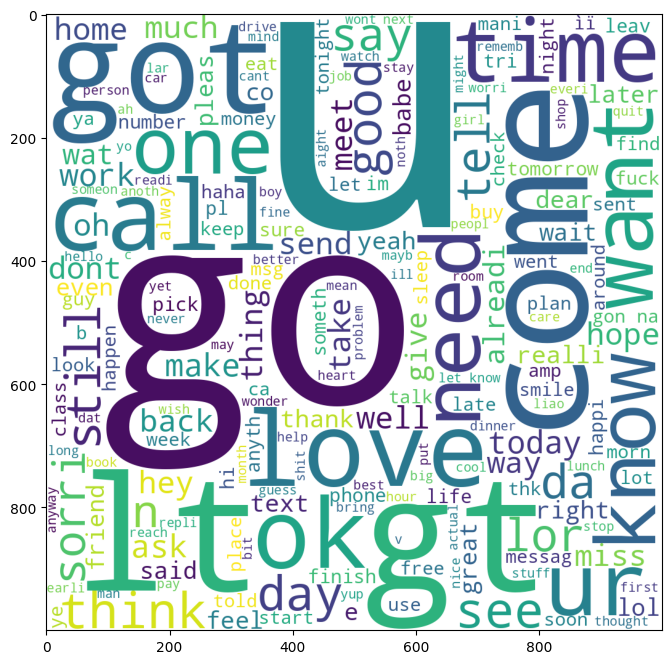

In [44]:
plt.figure(figsize = (12, 8))
plt.imshow(spam_wc)

In [45]:
spam_corpus = []
for msg in df[df["target"] == 1]["text_transform"].tolist() :
  for splitmsg in msg.split() :
    spam_corpus.append(splitmsg)

In [46]:
len(spam_corpus)

9939

In [47]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [48]:
ham_corpus = []
for msg in df[df["target"] == 0]["text_transform"].tolist() :
  for splitmsg in msg.split() :
    ham_corpus.append(splitmsg)

In [49]:
len(ham_corpus)

35404

In [50]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


**Model Building**

In [51]:
cv = CountVectorizer()

In [52]:
x = cv.fit_transform(df["text_transform"]).toarray()

In [53]:
x.shape

(5169, 6708)

In [54]:
y = df["target"].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(x_train, y_train)
print("for test set")
y_predgnb = gnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predgnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predgnb))
print("Precision: \n",precision_score(y_test,y_predgnb))
print("*"*50)
print("for training set")
y_predgnb_train = gnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predgnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predgnb_train))
print("Precision: \n",precision_score(y_train,y_predgnb_train))

for test set
Accuracy: 
 0.8684719535783365
Confusion_matrix: 
 [[772 117]
 [ 19 126]]
Precision: 
 0.5185185185185185
**************************************************
for training set
Accuracy: 
 0.9262394195888755
Confusion_matrix: 
 [[3322  305]
 [   0  508]]
Precision: 
 0.6248462484624846


In [60]:
mnb.fit(x_train, y_train)
print("for test set")
y_predmnb = mnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predmnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predmnb))
print("Precision: \n",precision_score(y_test,y_predmnb))
print("*"*50)
print("for training set")
y_predmnb_train = mnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predmnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predmnb_train))
print("Precision: \n",precision_score(y_train,y_predmnb_train))

for test set
Accuracy: 
 0.9738878143133463
Confusion_matrix: 
 [[872  17]
 [ 10 135]]
Precision: 
 0.8881578947368421
**************************************************
for training set
Accuracy: 
 0.9915356711003628
Confusion_matrix: 
 [[3614   13]
 [  22  486]]
Precision: 
 0.9739478957915831


In [61]:
bnb.fit(x_train, y_train)
print("for test set")
y_predbnb = bnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predbnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predbnb))
print("Precision: \n",precision_score(y_test,y_predbnb))
print("*"*50)
print("for training set")
y_predbnb_train = bnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predbnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predbnb_train))
print("Precision: \n",precision_score(y_train,y_predbnb_train))

for test set
Accuracy: 
 0.9661508704061895
Confusion_matrix: 
 [[885   4]
 [ 31 114]]
Precision: 
 0.9661016949152542
**************************************************
for training set
Accuracy: 
 0.9775090689238211
Confusion_matrix: 
 [[3624    3]
 [  90  418]]
Precision: 
 0.9928741092636579


tf idf

In [62]:
tfidf = TfidfVectorizer()

In [63]:
df.columns

Index(['target', 'text', 'num_characters', 'num_word', 'num_sent',
       'text_transform'],
      dtype='object')

In [64]:
xtfidf = tfidf.fit_transform(df["text_transform"]).toarray()

In [65]:
x.shape

(5169, 6708)

In [66]:
y = df["target"].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(xtfidf, y, test_size = 0.2, random_state = 42)

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(x_train, y_train)
print("for test set")
y_predgnb = gnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predgnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predgnb))
print("Precision: \n",precision_score(y_test,y_predgnb))
print("*"*50)
print("for training set")
y_predgnb_train = gnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predgnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predgnb_train))
print("Precision: \n",precision_score(y_train,y_predgnb_train))

for test set
Accuracy: 
 0.8636363636363636
Confusion_matrix: 
 [[772 117]
 [ 24 121]]
Precision: 
 0.5084033613445378
**************************************************
for training set
Accuracy: 
 0.9262394195888755
Confusion_matrix: 
 [[3322  305]
 [   0  508]]
Precision: 
 0.6248462484624846


In [71]:
mnb.fit(x_train, y_train)
print("for test set")
y_predmnb = mnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predmnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predmnb))
print("Precision: \n",precision_score(y_test,y_predmnb))
print("*"*50)
print("for training set")
y_predmnb_train = mnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predmnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predmnb_train))
print("Precision: \n",precision_score(y_train,y_predmnb_train))

for test set
Accuracy: 
 0.9613152804642167
Confusion_matrix: 
 [[888   1]
 [ 39 106]]
Precision: 
 0.9906542056074766
**************************************************
for training set
Accuracy: 
 0.9695284159613059
Confusion_matrix: 
 [[3627    0]
 [ 126  382]]
Precision: 
 1.0


In [72]:
bnb.fit(x_train, y_train)
print("for test set")
y_predbnb = bnb.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predbnb))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predbnb))
print("Precision: \n",precision_score(y_test,y_predbnb))
print("*"*50)
print("for training set")
y_predbnb_train = bnb.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predbnb_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predbnb_train))
print("Precision: \n",precision_score(y_train,y_predbnb_train))

for test set
Accuracy: 
 0.9661508704061895
Confusion_matrix: 
 [[885   4]
 [ 31 114]]
Precision: 
 0.9661016949152542
**************************************************
for training set
Accuracy: 
 0.9775090689238211
Confusion_matrix: 
 [[3624    3]
 [  90  418]]
Precision: 
 0.9928741092636579


# tfidf mnb

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(n_estimators=80, random_state=2)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [76]:
rf.fit(x_train, y_train)
print("for test set")
y_predrf = rf.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predrf))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predrf))
print("Precision: \n",precision_score(y_test,y_predrf))
print("*"*50)
print("for training set")
y_predrf_train = rf.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predrf_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predrf_train))
print("Precision: \n",precision_score(y_train,y_predrf_train))

for test set
Accuracy: 
 0.9680851063829787
Confusion_matrix: 
 [[889   0]
 [ 33 112]]
Precision: 
 1.0
**************************************************
for training set
Accuracy: 
 1.0
Confusion_matrix: 
 [[3627    0]
 [   0  508]]
Precision: 
 1.0


In [77]:
x_train, x_test, y_train, y_test = train_test_split(xtfidf, y, test_size = 0.2, random_state = 42)

In [78]:
rf.fit(x_train, y_train)
print("for test set")
y_predrf = rf.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predrf))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predrf))
print("Precision: \n",precision_score(y_test,y_predrf))
print("*"*50)
print("for training set")
y_predrf_train = rf.predict(x_train)
print("Accuracy: \n",accuracy_score(y_train,y_predrf_train))
print("Confusion_matrix: \n",confusion_matrix(y_train,y_predrf_train))
print("Precision: \n",precision_score(y_train,y_predrf_train))

for test set
Accuracy: 
 0.9690522243713733
Confusion_matrix: 
 [[888   1]
 [ 31 114]]
Precision: 
 0.991304347826087
**************************************************
for training set
Accuracy: 
 1.0
Confusion_matrix: 
 [[3627    0]
 [   0  508]]
Precision: 
 1.0


In [79]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(rf,open("model.pkl","wb"))

**Now Balance Target Column**

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
df.columns

Index(['target', 'text', 'num_characters', 'num_word', 'num_sent',
       'text_transform'],
      dtype='object')

In [82]:
xoversample = cv.fit_transform(df["text_transform"]).toarray()
yoversample = df["target"]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(xtfidf, y, test_size = 0.2, random_state = 42)

In [84]:
oversample = SMOTE(random_state = 42)
x_resample, y_resample = oversample.fit_resample(x_train, y_train)

In [86]:
rf.fit(x_resample, y_resample)
print("for test set")
y_predrfover = rf.predict(x_test)
print("Accuracy: \n",accuracy_score(y_test,y_predrfover))
print("Confusion_matrix: \n",confusion_matrix(y_test,y_predrfover))
print("Precision: \n",precision_score(y_test,y_predrfover))
print("*"*50)
print("for training set")
y_predrfover_train = rf.predict(x_resample)
print("Accuracy: \n",accuracy_score(y_resample,y_predrfover_train))
print("Confusion_matrix: \n",confusion_matrix(y_resample,y_predrfover_train))
print("Precision: \n",precision_score(y_resample,y_predrfover_train))

for test set
Accuracy: 
 0.9729206963249516
Confusion_matrix: 
 [[888   1]
 [ 27 118]]
Precision: 
 0.9915966386554622
**************************************************
for training set
Accuracy: 
 1.0
Confusion_matrix: 
 [[3627    0]
 [   0 3627]]
Precision: 
 1.0
